<a href="https://colab.research.google.com/github/likhith113/CODSOFT/blob/main/Movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task -2 movie rate predication

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_movie = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
display(df_movie.head())
df_movie.info()
display(df_movie.describe())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
display(df_movie.head())
df_movie.info()
display(df_movie.describe())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df_movie.dropna(subset=['Rating'], inplace=True)
# Fill missing values
df_movie['Votes'].fillna('0', inplace=True)
df_movie['Votes'] = df_movie['Votes'].str.replace(',', '', regex=False)
df_movie['Votes'] = pd.to_numeric(df_movie['Votes'])

# Handle missing values
df_movie['Year'].fillna('0', inplace=True)
df_movie['Year'] = df_movie['Year'].str.extract('(\d+)').astype(float) # Extract digits and convert to float
categorical_cols = ['Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df_movie[col].fillna('Unknown', inplace=True)

df_movie['Duration'] = df_movie['Duration'].str.replace(' min', '', regex=False)
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'], errors='coerce')
df_movie['Duration'].fillna(0, inplace=True)

df_movie.info()
display(df_movie.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  7919 non-null   float64
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int64  
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 680.5+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [7]:
# Create dummy variables
genre_dummies = df_movie['Genre'].str.get_dummies(sep=', ')
df_movie = pd.concat([df_movie, genre_dummies], axis=1)

director_dummies = pd.get_dummies(df_movie['Director'], prefix='Director')
df_movie = pd.concat([df_movie, director_dummies], axis=1)

actor1_dummies = pd.get_dummies(df_movie['Actor 1'], prefix='Actor_1')
df_movie = pd.concat([df_movie, actor1_dummies], axis=1)

actor2_dummies = pd.get_dummies(df_movie['Actor 2'], prefix='Actor_2')
df_movie = pd.concat([df_movie, actor2_dummies], axis=1)

actor3_dummies = pd.get_dummies(df_movie['Actor 3'], prefix='Actor_3')
df_movie = pd.concat([df_movie, actor3_dummies], axis=1)

df_movie.drop(columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
display(df_movie.head())

,Name,Year,Duration,Rating,Votes,Action,Adventure,Animation,Biography,Comedy,...,Actor_3_Zarine Ali,Actor_3_Zayed Khan,Actor_3_Zebunissa,Actor_3_Zeenat Aman,Actor_3_Zeeshan Khan,Actor_3_Zeishan Quadri,Actor_3_Zenobia Shroff,Actor_3_Zohra,Actor_3_Zoya Hussain,Actor_3_Zulfi Sayed
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019.0,110.0,4.4,35,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997.0,147.0,4.7,827,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005.0,142.0,7.4,1086,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012.0,82.0,5.6,326,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


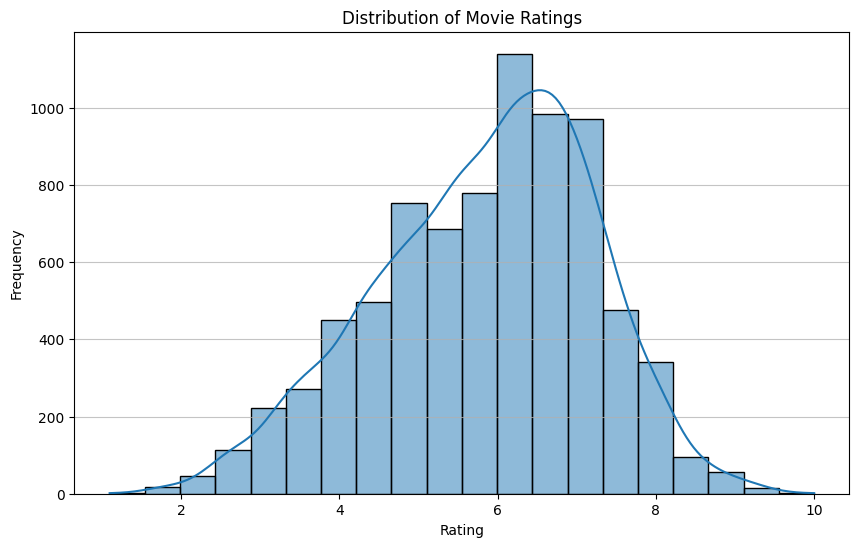

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 1. Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_movie['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df_movie.drop(columns=['Name', 'Rating'])
y = df_movie['Rating']

# Split data fpr testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print(" trained successfully.")

 trained successfully.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# predictions with Ridge Regression model
y_pred_ridge = ridge_model.predict(X_test)

# evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# metrics
print("--- Ridge Regression Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")
print("-" * 30)

# predictions with Random Forest Regressor model
y_pred_rf = rf_model.predict(X_test)

# evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# metrics
print("--- Random Forest Regressor Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")
print("-" * 30)

print("Model Comparison")
if r2_rf > r2_ridge:
    print("Random Forest Regressor performed better.")
elif r2_ridge > r2_rf:
    print("Ridge Regression performed better.")
else:
    print("Both models performed")

if mae_rf < mae_ridge:
    print("Random Forest Regressor has a lower MAE")
elif mae_ridge < mae_rf:
    print("Ridge Regression has a lower MAE")
else:
    print("Both models have similar MAE.")
print("-" * 30)

--- Ridge Regression Metrics ---
Mean Absolute Error (MAE): 0.9273
Mean Squared Error (MSE): 1.4167
R-squared (R2): 0.2614
------------------------------
--- Random Forest Regressor Metrics ---
Mean Absolute Error (MAE): 0.8029
Mean Squared Error (MSE): 1.1738
R-squared (R2): 0.3881
------------------------------
Model Comparison
Random Forest Regressor performed better.
Random Forest Regressor has a lower MAE
------------------------------


In [10]:
y_pred_rf = rf_model.predict(X_test)

feature_importances = rf_model.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sorting in descending order.
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Top 10 Most Important Features:")
display(sorted_feature_importances.head(10))

Top 10 Most Important Features:


,0
Votes,0.201334
Year,0.184032
Duration,0.063760
Documentary,0.031754
Action,0.020455
Drama,0.014912
Horror,0.014241
Romance,0.013878
Comedy,0.010762
Thriller,0.008578
